# Explorando os dados

## Entendendo o conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\enama\OneDrive\Alura\Data Science\IA Aumentada\flights.csv")
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
df.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [4]:
df.shape

(71175, 11)

In [5]:
df.describe().round(2)

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.00,71175.00,71175.00,71175.00,71175.00,71175.00
mean,15.47,13.28,16.48,182.00,2016.00,12.55
std,8.65,4.02,4.14,105.37,3.74,23.13
min,1.00,7.07,10.07,0.00,2010.00,-41.03
25%,8.00,8.94,12.67,91.00,2013.00,-4.41
50%,15.00,14.26,16.38,182.00,2016.00,9.74
75%,23.00,16.91,20.04,273.00,2019.00,27.65
max,30.00,19.34,23.34,364.00,2022.00,125.63


In [6]:
df.describe(include='object').round(2)

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


# Visualizações gráficas dos dados

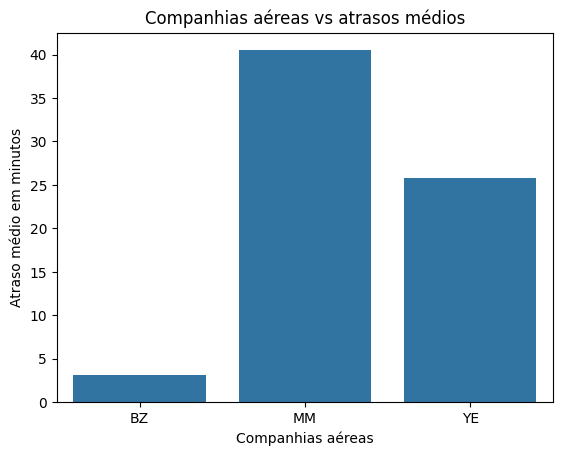

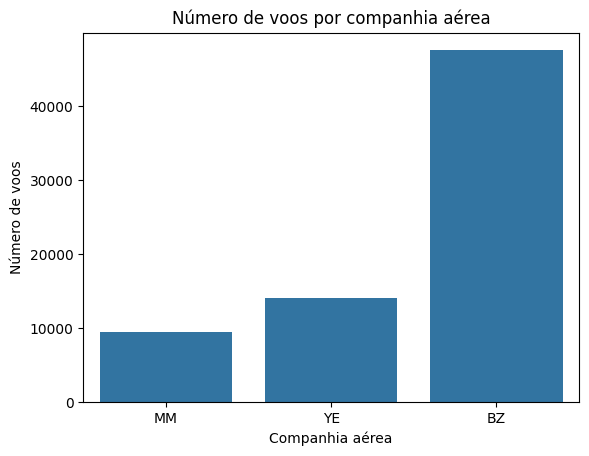

In [8]:
average_delay = df.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=df, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

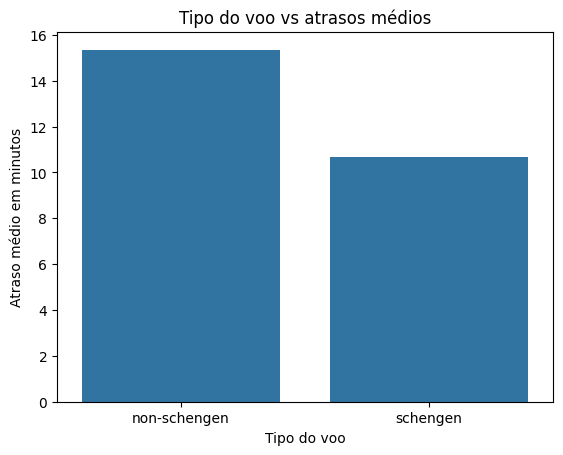

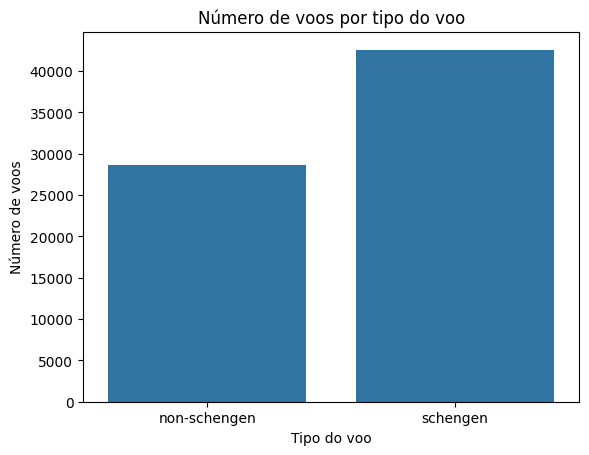

In [9]:
average_delay = df.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=df, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

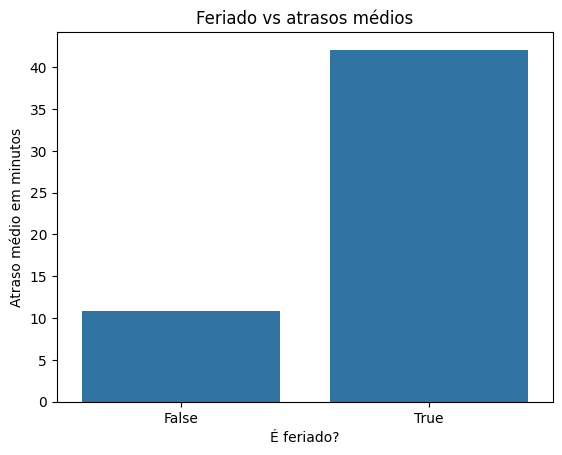

In [10]:
average_delay = df.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

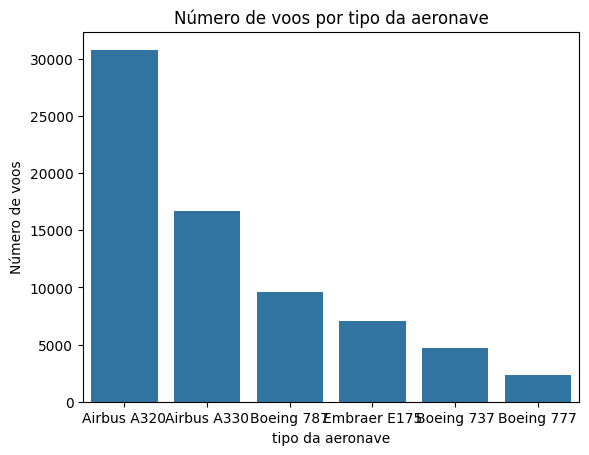

In [11]:
order = df['aircraft_type'].value_counts().index

sns.countplot(data=df, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xlabel('tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

# Analisando a distribuição dos dados

In [12]:
def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)

    return largura_bin

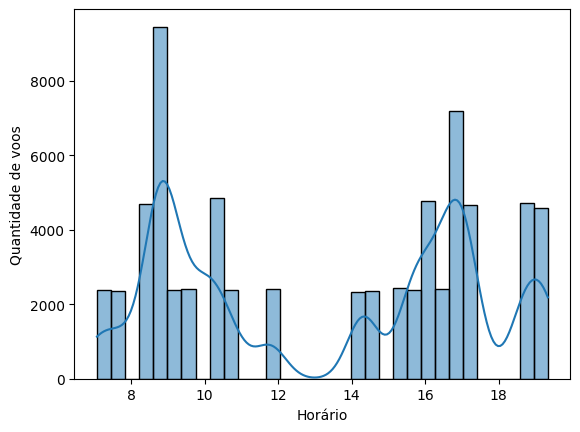

In [13]:
largura_bin_at = calcular_largura_bin(df, 'arrival_time')

sns.histplot(data=df, x='arrival_time', kde=True, binwidth=largura_bin_at)
plt.xlabel('Horário')
plt.ylabel('Quantidade de voos');

<Axes: xlabel='departure_time', ylabel='Count'>

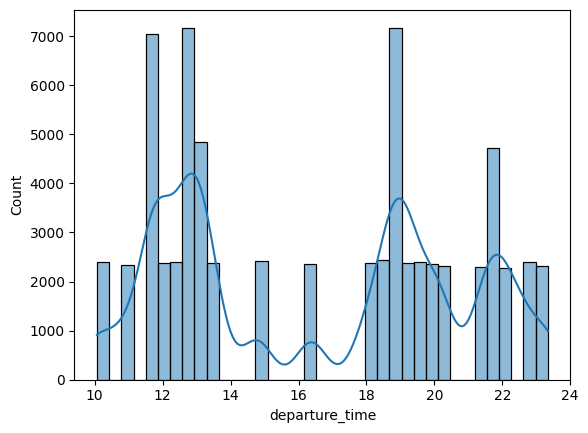

In [14]:
largura_bin_at = calcular_largura_bin(df, 'departure_time')

sns.histplot(data=df, x='departure_time', kde=True, binwidth=largura_bin_at)

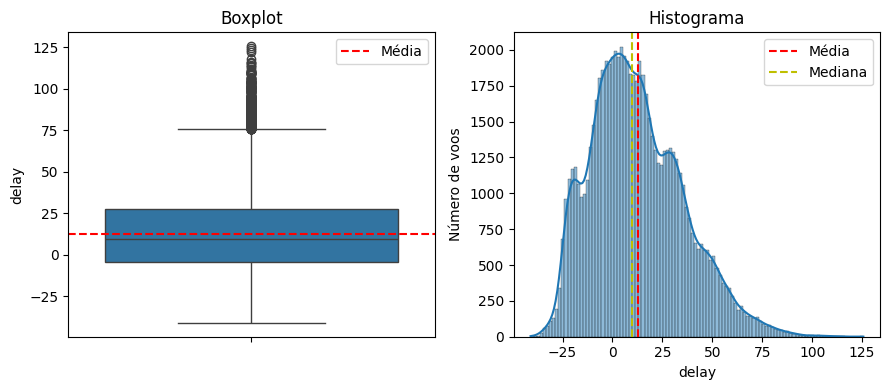

In [15]:
mean_delay = df['delay'].mean()
median_delay = df['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=df, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(df, 'delay')
sns.histplot(data=df, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

# Feature Engineering

In [16]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [17]:
df['year'].astype(str)

0        2010
1        2010
2        2010
3        2010
4        2010
         ... 
71170    2022
71171    2022
71172    2022
71173    2022
71174    2022
Name: year, Length: 71175, dtype: object

In [18]:
(df['day']+1).astype(str)

0          1
1          1
2          1
3          1
4          1
        ... 
71170    365
71171    365
71172    365
71173    365
71174    365
Name: day, Length: 71175, dtype: object

In [19]:
# Concatenando, casting para datetime e criando nova coluna para ter uma clareza sobre a data

df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + (df['day']+1).astype(str), format='%Y-%j')
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [20]:
# Criando nova coluna para categorizar os dias separados entre dias da semana e final de semana

df['is_weekend'] = df['date'].dt.weekday.isin([5, 6])
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False


In [21]:
df['day_name'] = df['date'].dt.day_name()
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


# Feature Encoding

In [22]:
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [23]:
df['schengen'] = df['schengen'].replace({'non-schengen': 0, 'schengen': 1})
df['is_holiday'] = df['is_holiday'].replace({False: 0, True: 1})
df['is_weekend'] = df['is_weekend'].replace({False: 0, True: 1});
df.head()

C:\Users\enama\AppData\Local\Temp\ipykernel_5116\1517627935.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['schengen'] = df['schengen'].replace({'non-schengen': 0, 'schengen': 1})
C:\Users\enama\AppData\Local\Temp\ipykernel_5116\1517627935.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_holiday'] = df['is_holiday'].replace({False: 0, True: 1})
C:\Users\enama\AppData\Local\Temp\ipykernel_5116\1517627935.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. T

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [24]:
variaveis_categoricas = ['airline', 'aircraft_type', 'day_name', 'origin']

In [25]:
df_encoded = pd.get_dummies(data = df, columns = variaveis_categoricas, dtype = int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_AUZ,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,0,0,0,0,0,0,0,1,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,0,0,0,0,0,0,0,1,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,0,1,0,0,0,0,0


# Data Cleaning

In [26]:
df[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [27]:
df_clean = df_encoded.drop(["flight_id", "departure_time", "day", "year", "date"], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_AUZ,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


# Seleção e validação do modelo

## Treinamento do DummyRegressor

In [28]:
x = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [30]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(x_train, y_train)

DummyRegressor()

In [31]:
y_pred_dummy = model_dummy.predict(x_test)
y_pred_dummy

array([12.52857512, 12.52857512, 12.52857512, ..., 12.52857512,
       12.52857512, 12.52857512])

In [32]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regressao(y_test, y_pred):
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raiz do Erro Quadrático Médio (RMSE)': round(rmse, 4),
        'Erro Absoluto Médio (MAE):': round(mae, 4),
        'R2 Score': round(r2, 4)
    }
    
    return metricas

In [33]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio (RMSE)': 23.2241,
 'Erro Absoluto Médio (MAE):': 18.6127,
 'R2 Score': -0.0}

In [34]:
model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(x_train, y_train)

DummyRegressor()

# Treinamento do RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do Erro Quadrático Médio (RMSE)': 13.7301,
 'Erro Absoluto Médio (MAE):': 11.0138,
 'R2 Score': 0.6505}

C:\Users\enama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


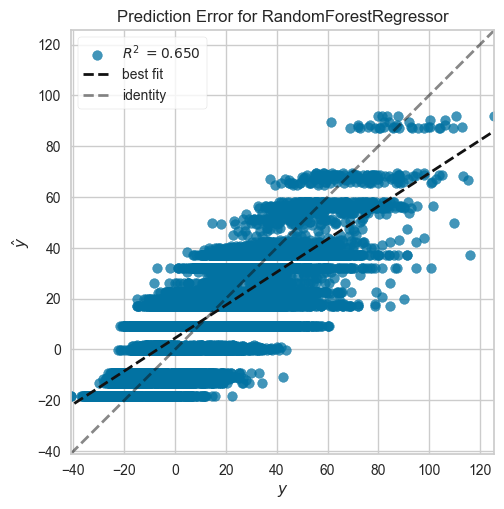

In [36]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, x_train, y_train, x_test, y_test)

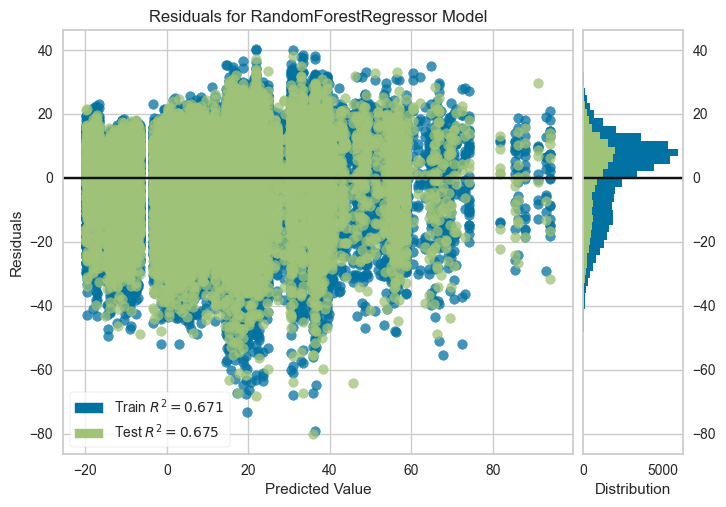

In [37]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(RandomForestRegressor(), x_train, y_train, x_test, y_test)

# Validação Cruzada

In [38]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, x_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([1.80439043, 1.74037218, 1.79984593, 1.80204058, 1.75553823]),
 'score_time': array([0.03617024, 0.03329778, 0.03355336, 0.03462911, 0.0341258 ]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [39]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = '{:.3f}'.format(scores.mean())
    std_score = '{:.3f}'.format(scores.std())

    print(f'{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}')
    print(f'{metric.upper()} Mean: {mean_score}, Std: {std_score}')
    print('--------------------')

MAE Scores: ['-11.074', '-11.303', '-11.056', '-11.145', '-11.174']
MAE Mean: -11.151, Std: 0.088
--------------------
RMSE Scores: ['-13.767', '-14.049', '-13.793', '-13.877', '-13.930']
RMSE Mean: -13.883, Std: 0.101
--------------------
R2 Scores: ['0.647', '0.624', '0.645', '0.641', '0.635']
R2 Mean: 0.638, Std: 0.008
--------------------


# Otimização de hiperparâmetros

## Seleção de recursos

C:\Users\enama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


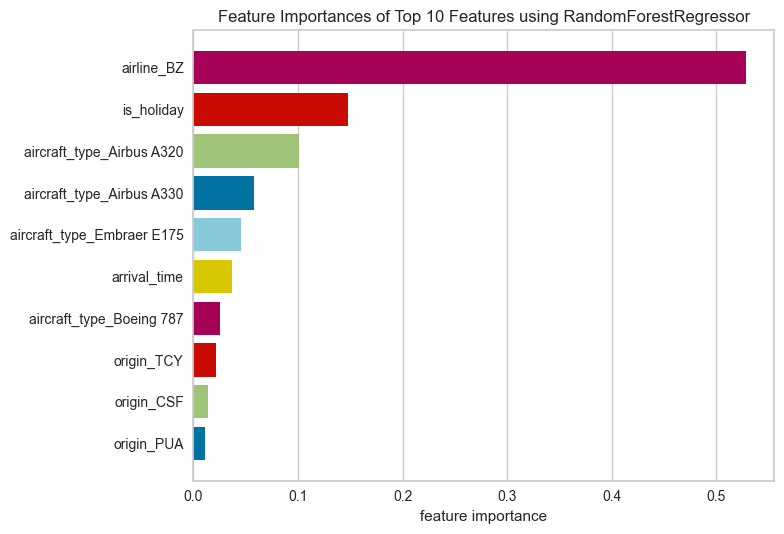

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [40]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(x_train, y_train)
viz.show()

In [41]:
importances = model_rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': x.columns, 'Importances': importances}).sort_values('Importances', ascending=False)
feature_importances

,Feature,Importances
4,airline_BZ,0.528604
2,is_holiday,0.147833
7,aircraft_type_Airbus A320,0.100711
8,aircraft_type_Airbus A330,0.058221
12,aircraft_type_Embraer E175,0.045614
1,arrival_time,0.036911
11,aircraft_type_Boeing 787,0.025416
27,origin_TCY,0.021370
22,origin_CSF,0.014253
26,origin_PUA,0.010642


In [42]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in [1, 5, 10, 15, 20, 25, 30]:
    selected_features = feature_importances['Feature'].values[:count]

    x_train_selected = x_train[selected_features]
    x_test_selected = x_test[selected_features]

    model_selected_features.fit(x_train_selected, y_train)

    y_pred = model_selected_features.predict(x_test_selected)   

    metrics = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metrics.values()) 

results_df

,1,5,10,15,20,25,30
RMSE,18.8639,15.1651,13.7426,13.7335,13.7307,13.7307,13.7301
MAE,14.9854,12.0714,11.0282,11.0164,11.0137,11.0142,11.0138
R2,0.3402,0.5736,0.6498,0.6503,0.6504,0.6504,0.6505


In [43]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
    selected_features = feature_importances['Feature'].values[:count]

    x_train_selected = x_train[selected_features]
    x_test_selected = x_test[selected_features]

    model_selected_features.fit(x_train_selected, y_train)

    y_pred = model_selected_features.predict(x_test_selected)   

    metrics = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metrics.values()) 

results_df

,10,11,12,13,14,15
RMSE,13.7426,13.7378,13.7344,13.7348,13.7335,13.7335
MAE,11.0282,11.0258,11.0173,11.0177,11.0164,11.0164
R2,0.6498,0.6501,0.6503,0.6502,0.6503,0.6503


In [44]:
selected_features = feature_importances['Feature'].values[:13]

x_select_features = x[selected_features]

x_select_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_select_features, y, random_state=42)

# Otimizando os hiperparâmetros com o GridSearchCV

In [46]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 150, 200]
}

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2', cv=cv)

model_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [49]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [50]:
y_pred_model_grid = model_grid.predict(x_test)

metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

{'Raiz do Erro Quadrático Médio (RMSE)': 13.2308,
 'Erro Absoluto Médio (MAE):': 10.6296,
 'R2 Score': 0.6754}

In [51]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df 

,10,11,12,13,14,15,model_grid
RMSE,13.7426,13.7378,13.7344,13.7348,13.7335,13.7335,13.2308
MAE,11.0282,11.0258,11.0173,11.0177,11.0164,11.0164,10.6296
R2,0.6498,0.6501,0.6503,0.6502,0.6503,0.6503,0.6754


# Salvando o modelo

In [52]:
import pickle

In [57]:
try:
    with open('model_producao.pkl', 'wb') as file: 
        pickle.dump(model_grid.best_estimator_, file) 
    print('Modelo salvo com sucesso!!!')
except Exception as e:
    print ('Ocorreu um erro ao salvar o modelo: ', str(e))

Modelo salvo com sucesso!!!


# Utilizando o modelo salvo

In [62]:
nova_amostra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [63]:
file_path = "C:/Users/enama/OneDrive/Alura/Data Science/IA Aumentada/model_producao.pkl"

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print('Modelo carregado com sucesso!!!')
except Exception as e:
    print ('Ocorreu um erro ao carregar o modelo: ', str(e))

Modelo carregado com sucesso!!!


In [64]:
# Exemplo de previsão com dados de entrada 'X'
model.predict([nova_amostra])[0]

C:\Users\enama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(48.73321005358915)